### Project
#### Project Title: Predicting Sales with TV Advertising
#### Project Description:
  ##### In this project, you will explore and analyze the relationship between TV advertising budgets and product sales using the Linear Regression machine learning model. You will utilize a dataset that contains information about TV advertising budgets and corresponding sales figures.
  ##### You will also explore other ML algorithms such as Polynomial Regression to see if they provide a better fit for the data.
            

#### LINEAR REGRESSION

In [1]:
#Import useful Libraries

#for visualization
import matplotlib.pyplot as plt

#for loading DataFrame and some manipulation
import pandas as pd

#for splitting data into: training and testing data
from sklearn.model_selection import train_test_split

#to build the Linear regression model
from sklearn.linear_model import LinearRegression 

#to build the Polynomial regression model
from sklearn.preprocessing import PolynomialFeatures

#to be able to evaluate the built model to see how its performing using mean_absolute and mean_square errors
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#to hide/ignore warnings
import warnings
warnings.simplefilter(action = "ignore")

In [2]:
#Import Dataset

m_Tdf = pd.read_csv(r"C:\Users\damil\Documents\2024 Skills\Data Science_Python\python-for-data-science-dataset\python-for-data-science-course-main\advertising.csv")

#Dataset overview

m_Tdf.head(2)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


In [3]:
#Cleaning

#check for null values
m_Tdf.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [4]:
#Cleaning

#check other info
m_Tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
#Numerical Statistics overview
m_Tdf.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


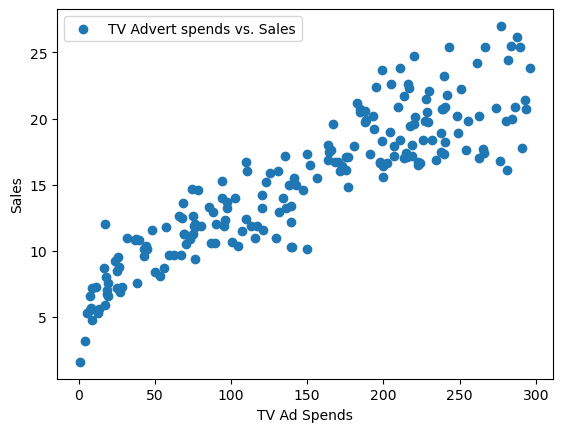

In [6]:
#visualize the relationship between TV advertising spends and Product sales
x = m_Tdf["TV"]
y = m_Tdf["Sales"]

plt.scatter(x,y, label = "TV Advert spends vs. Sales" )
plt.xlabel("TV Ad Spends")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [7]:
#Creating the Model
mTV_model = LinearRegression()

In [8]:
#Preparing our data

#what helps to predict
X = m_Tdf[["TV"]]       #ensure its a 2D array [[]] 

#what we intend to predict
y = m_Tdf["Sales"]

In [9]:
#splitting the dataset into train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [10]:
#to check the split
print(m_Tdf.shape)
print(X_train.shape)
print(X_test.shape)

(200, 4)
(160, 1)
(40, 1)


In [11]:
#train mdf_model with the training dataset

#using the fit model in Linear Regression
mTV_model.fit(X_train,y_train)

LinearRegression()

In [12]:
#using the trained model to make predictions With the test data

y_pred = mTV_model.predict(X_test)

In [13]:
#Evaluting the model using Mean Absolute Error (MAE)

mTdf_Mae = mean_absolute_error(y_test, y_pred)
print("The Mean Absolute Error is", mTdf_Mae,"for LR")
print()

#Evaluting the model using Mean Squared Error (MSE)

mTdf_Mse = mean_squared_error(y_test, y_pred)
print("The Mean Squared Error is", mTdf_Mse,"for LR")


The Mean Absolute Error is 1.9502948931650088 for LR

The Mean Squared Error is 6.101072906773964 for LR


In [14]:
#Testing the Model

Ty_pred = mTV_model.predict([[15]])
Ty_pred

array([7.83935259])

In [15]:
#Saving the Model

#import the library
import joblib

#saving

joblib.dump(mTV_model, "mTdfLinearRegressionModel.pkl")

['mTdfLinearRegressionModel.pkl']

In [16]:
#Insight

#Result: both MAE(1.95) and MSE(6.10) are low, implying a better model performance

#The fact that MSE is notably higher than MAE suggests that there might be some outliers or cases where the model's 
#predictions are significantly off. This is because MSE penalizes larger errors more severely due to the squaring of 
#the differences.

#If outliers are influencing the MSE, you might want to investigate those data points further to 
#understand whether they are true outliers, data errors, or cases where the model is underperforming.

#### POLYNOMIAL REGRESSION

In [17]:
#linear regression is just a first-degree polynomial. Polynomial regression uses higher-degree polynomials. 
#Both of them are linear models, but the first results in a straight line, the latter gives you a curved line.

In [18]:
#Creating the PR Model
poly_features = PolynomialFeatures(degree=2)#, include_bias=False)

#degree=2 means that we want to work with a 2nd degree polynomial: y = ß0 + ß1x + ß2x2 i.e quardratic
#include_bias=False should be set to False, because we’ll use PolynomialFeatures together with LinearRegression() later on.

In [19]:
#take the original training data, and then use the polynomial features to transform the x_train and y_train 

#for training data
X_trainPoly = poly_features.fit_transform(X_train)

#for testing data
X_testPoly = poly_features.fit_transform(X_test)

In [20]:
#Create a Linear regression model and fit it with the Polynomial features
mTV_model.fit(X_trainPoly ,y_train)

LinearRegression()

In [21]:
#using the trained model to make predictions with the test data

y_polypred = mTV_model.predict(X_testPoly)


In [22]:
#Evaluting the model using Mean Absolute Error (MAE)

mTdf_PMae = mean_absolute_error(y_test, y_polypred)
print("The Mean Absolute Error is", mTdf_PMae,"for PR")
print()

#Evaluting the model using Mean Squared Error (MSE)

mTdf_PMse = mean_squared_error(y_test, y_polypred)
print("The Mean Squared Error is", mTdf_PMse,"for PR")


The Mean Absolute Error is 1.866861266125855 for PR

The Mean Squared Error is 5.682891191398315 for PR


In [23]:
#Insight

#Recap of the Results:
#Linear Regression Results:                           Polynomial Regression (PR) Results:                                 

#Mean Absolute Error (MAE): 1.95                      Mean Absolute Error (MAE): 1.87
#Mean Squared Error (MSE): 6.10                       Mean Squared Error (MSE): 5.68


#Interpretation: The polynomial model has a slightly lower MAE, indicating that, on average, its predictions are closer 
                #to the actual values than the linear model's predictions. The polynomial model has a lower MSE as well, 
                #which suggests that not only does it have smaller errors on average, but it also has fewer instances of 
                #large errors compared to the linear model.
            
                #This improvement suggests that the relationship between the features and the target variable is likely 
                #non-linear, and the polynomial model is better able to capture this complexity.
               
                #However, it is recommended to validate these findings with additional data or through cross-validation 
                #to ensure that the polynomial model generalizes well to unseen data.
    
    
    
